#Performance of Viewed Content and Viewers Engagement Analysis on Vidio

#Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Vidio Data Analyst Study Case - Sheila Fitria A/10%.csv')

ParserError: ignored

#Check the error of the CSV File

In [ ]:
import csv
with open('/content/drive/MyDrive/Vidio Data Analyst Study Case - Sheila Fitria A/10%.csv', 'r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)


In [ ]:
total_data = len(data)
error_count = 0

for index, row in enumerate(data):
    if len(row) != 41:  # Adjust the expected number of fields accordingly
        error_count += 1
        print(f"Error on line {index+1}: Expected 41 fields, found {len(row)} fields.")

error_percentage = (error_count / total_data) * 100

print(f"Total data: {total_data}")
print(f"Total errors: {error_count}")
print(f"Error percentage: {error_percentage}%")


Error on line 7655: Expected 41 fields, found 42 fields.
Error on line 28027: Expected 41 fields, found 49 fields.
Error on line 29868: Expected 41 fields, found 42 fields.
Error on line 41317: Expected 41 fields, found 49 fields.
Error on line 50334: Expected 41 fields, found 42 fields.
Error on line 57183: Expected 41 fields, found 42 fields.
Error on line 61465: Expected 41 fields, found 49 fields.
Error on line 68522: Expected 41 fields, found 49 fields.
Error on line 74582: Expected 41 fields, found 42 fields.
Error on line 83509: Expected 41 fields, found 42 fields.
Error on line 94944: Expected 41 fields, found 42 fields.
Error on line 130829: Expected 41 fields, found 42 fields.
Error on line 163627: Expected 41 fields, found 42 fields.
Error on line 185137: Expected 41 fields, found 42 fields.
Error on line 197897: Expected 41 fields, found 42 fields.
Error on line 206057: Expected 41 fields, found 42 fields.
Error on line 213623: Expected 41 fields, found 42 fields.
Error on 

**Because the error rows only 0.009% from the total data, so the rows will be dropped or excluded**

##Drop the Error Rows

In [ ]:
cleaned_data = []
for index, row in enumerate(data):
    try:
        if len(row) == 41:  # Adjust the expected number of fields accordingly
            cleaned_data.append(row)
        else:
            print(f"Skipping line {index+1} with {len(row)} fields.")
    except Exception as e:
        print(f"Error on line {index+1}: {str(e)}")


Skipping line 7655 with 42 fields.
Skipping line 28027 with 49 fields.
Skipping line 29868 with 42 fields.
Skipping line 41317 with 49 fields.
Skipping line 50334 with 42 fields.
Skipping line 57183 with 42 fields.
Skipping line 61465 with 49 fields.
Skipping line 68522 with 49 fields.
Skipping line 74582 with 42 fields.
Skipping line 83509 with 42 fields.
Skipping line 94944 with 42 fields.
Skipping line 130829 with 42 fields.
Skipping line 163627 with 42 fields.
Skipping line 185137 with 42 fields.
Skipping line 197897 with 42 fields.
Skipping line 206057 with 42 fields.
Skipping line 213623 with 42 fields.
Skipping line 216084 with 42 fields.
Skipping line 227679 with 49 fields.
Skipping line 251548 with 42 fields.
Skipping line 261391 with 42 fields.
Skipping line 262030 with 42 fields.
Skipping line 264908 with 42 fields.
Skipping line 287859 with 42 fields.
Skipping line 299433 with 42 fields.
Skipping line 311877 with 42 fields.
Skipping line 313477 with 42 fields.
Skipping line

In [ ]:
with open('cleaned_data.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows(cleaned_data)


#Reload the Data

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')
print('Total Row : ', len(df))
df.head(5)

Total Row :  742582


,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


#Data Understanding & Preparation



##Describe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

##Check the missing value

In [ ]:
# Missing value percentage for each column
column_null_percentage = df.isnull().mean() * 100
print(column_null_percentage)

hash_content_id        0.000000
hash_play_id           0.000000
hash_visit_id          0.000000
hash_watcher_id        0.000000
hash_film_id          94.542690
hash_event_id          0.000000
is_login               0.000000
playback_location      0.000000
platform               0.000000
play_time              0.000000
end_time               0.000000
referrer               5.448961
average_bitrate        4.725000
bitrate_range          0.000000
total_bytes            0.000000
buffer_duration        0.000000
referrer_group         0.000000
completed             36.496979
utm_source            99.894288
utm_medium            99.894692
utm_campaign          99.955291
player_name            3.080468
has_ad                 0.000000
flash_version         32.714232
os_name               31.689968
os_version             0.368175
browser_name          31.607149
browser_version       33.869391
app_name               0.000000
autoplay              36.516775
is_premium             0.000000
app_vers

for columns with missing value >50% will be dropped because lack of sufficient information and potentially biased. the remaining columns with missing value will be retained and handled

##Handling Missing Value

In [ ]:
# drop columns with missing value >50%
columns_to_drop = column_null_percentage[column_null_percentage > 50].index
df_dropped = df.drop(columns=columns_to_drop)

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_event_id      742582 non-null  object 
 5   is_login           742582 non-null  bool   
 6   playback_location  742582 non-null  object 
 7   platform           742582 non-null  object 
 8   play_time          742582 non-null  object 
 9   end_time           742582 non-null  object 
 10  referrer           702119 non-null  object 
 11  average_bitrate    707495 non-null  float64
 12  bitrate_range      742582 non-null  object 
 13  total_bytes        742582 non-null  int64  
 14  buffer_duration    742582 non-null  float64
 15  referrer_group     742582 non-null  object 
 16  co

In [ ]:
df_dropped.head(5)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,...,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,title,category_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,2020-02-15T12:28:49.000Z,...,28,NaN,NaN,vidio,True,False,1263,vod,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,2020-02-14T18:37:52.000Z,...,6.0.1,LINE,10.1.1,vidio,False,False,0,vod,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,2020-02-15T11:59:01.000Z,...,9,Facebook,256.0.0,vidio,False,False,8,vod,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,2020-02-15T06:37:08.000Z,...,8.1.0,Facebook,256.0.0,vidio,False,False,53,vod,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,2020-02-15T01:53:57.000Z,...,8.0.0,LINE,10.0.2,vidio,False,False,53,vod,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News


In [ ]:
columns_to_print = ['referrer', 'average_bitrate', 'completed', 'player_name', 'flash_version',
                    'os_name', 'os_version', 'browser_name', 'browser_version', 'autoplay', 'category_name']

# the columns with missing value
df_dropped[columns_to_print]


,referrer,average_bitrate,completed,player_name,flash_version,os_name,os_version,browser_name,browser_version,autoplay,category_name
0,search,300000.0,False,NaN,NaN,NaN,28,NaN,NaN,True,Movies
1,https://m.vidio.com/embed/1899913?autoplay=false,300000.0,False,videojs,"0,0,0",Android,6.0.1,LINE,10.1.1,False,News
2,https://m.liputan6.com/regional/read/4177821/v...,300000.0,False,videojs,"0,0,0",Android,9,Facebook,256.0.0,False,News
3,https://m.liputan6.com/news/read/4178059/polis...,300000.0,True,videojs,"0,0,0",Android,8.1.0,Facebook,256.0.0,False,News
4,https://today.line.me/id/article/Viral+Siswa+D...,300000.0,True,videojs,"0,0,0",Android,8.0.0,LINE,10.0.2,False,News
...,...,...,...,...,...,...,...,...,...,...,...
742577,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,False,videojs,"0,0,0",Android,9,Facebook,245.0.0,False,News
742578,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,False,videojs,"0,0,0",Android,7.1.1,Facebook,221.0.0,False,News
742579,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,False,videojs,"0,0,0",Android,7.0,Facebook,237.0.0,False,News
742580,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,False,videojs,"0,0,0",Android,6.0.1,Facebook,256.0.0,False,News


notes handling missing value:
1. refferer,completed,os_name,browser_name,browser_version,autoplay,category_name bikin kategori baru unknown krn nullnya >30%
2. average bitrate pake imputation mean krn nullnya cuma 4%
4. flash version column dropped krn tidak informatif
6. os version drop rows missing value <1%
11. yang bool ubah semua ke object

In [ ]:
# for the columns below, replace null values with 'unknown' to avoid data loss
df_dropped['referrer'] = df_dropped['referrer'].fillna('unknown')
df_dropped['completed'] = df_dropped['completed'].fillna('unknown')
df_dropped['os_name'] = df_dropped['os_name'].fillna('unknown')
df_dropped['browser_name'] = df_dropped['browser_name'].fillna('unknown')
df_dropped['browser_version'] = df_dropped['browser_version'].fillna('unknown')
df_dropped['autoplay'] = df_dropped['autoplay'].fillna('unknown')
df_dropped['category_name'] = df_dropped['category_name'].fillna('unknown')
df_dropped['player_name'] = df_dropped['category_name'].fillna('unknown')


In [ ]:
# drop flash_version column because it is not informative refer to the data dictionary
df_dropped = df_dropped.drop('flash_version', axis=1)

In [ ]:
# drop nan rows from os_version because its <1% from the total data
df_dropped = df_dropped.dropna(subset=['os_version'])

In [ ]:
# change all bool data type to string
df_dropped.loc[:, 'is_login'] = df_dropped['is_login'].astype(str)
df_dropped.loc[:, 'has_ad'] = df_dropped['has_ad'].astype(str)
df_dropped.loc[:, 'is_premium'] = df_dropped['is_premium'].astype(str)


In [ ]:
# handle missing value with mean imputation
mean_bitrate = df_dropped['average_bitrate'].mean()
df_dropped['average_bitrate'] = df_dropped['average_bitrate'].fillna(mean_bitrate)


In [ ]:
# change play_time and end_type data types into datetime data type
df_dropped['play_time'] = pd.to_datetime(df_dropped['play_time'])
df_dropped['end_time'] = pd.to_datetime(df_dropped['end_time'])

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739848 entries, 0 to 742581
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   hash_content_id    739848 non-null  object             
 1   hash_play_id       739848 non-null  object             
 2   hash_visit_id      739848 non-null  object             
 3   hash_watcher_id    739848 non-null  object             
 4   hash_event_id      739848 non-null  object             
 5   is_login           739848 non-null  object             
 6   playback_location  739848 non-null  object             
 7   platform           739848 non-null  object             
 8   play_time          739848 non-null  datetime64[ns, UTC]
 9   end_time           739848 non-null  datetime64[ns, UTC]
 10  referrer           739848 non-null  object             
 11  average_bitrate    739848 non-null  float64            
 12  bitrate_range      739848 non-

## Check the duplicated data

In [ ]:
df_dropped.duplicated().sum()

0

**no duplicated data**

#Statistical Summary

In [ ]:
# select columns with categorical data
categoricals = list(df_dropped.select_dtypes(include=['object']).columns)

# select columns with numerical data
numericals = list(df_dropped.select_dtypes(include=['float', 'int']).columns)

categorical_count = len(df_dropped.select_dtypes(include=['object']).columns)
numerical_count = len(df_dropped.select_dtypes(include=['float', 'int']).columns)

print('Categorical columns:', categorical_count,"->", categoricals)
print('Numerical columns:', numerical_count, "->",numericals)

Categorical columns: 24 -> ['hash_content_id', 'hash_play_id', 'hash_visit_id', 'hash_watcher_id', 'hash_event_id', 'is_login', 'playback_location', 'platform', 'referrer', 'bitrate_range', 'referrer_group', 'completed', 'player_name', 'has_ad', 'os_name', 'os_version', 'browser_name', 'browser_version', 'app_name', 'autoplay', 'is_premium', 'content_type', 'title', 'category_name']
Numerical columns: 4 -> ['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']


In [ ]:
df_dropped[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
average_bitrate,739848.0,1.995193e+05,1.380993e+05,144.000,700.000,300000.0,300000.0,3.000000e+05
total_bytes,739848.0,8.015645e+07,5.129611e+08,0.000,750.000,525000.0,11250000.0,5.065312e+10
buffer_duration,739848.0,4.083982e+02,7.201759e+04,-4.639,0.024,1.0,6.0,6.117224e+07
play_duration,739848.0,4.327303e+02,1.649513e+03,0.000,4.000,41.0,120.0,1.350750e+05


Observation:

1. the distribution of the numerical features is likely to be non-uniform or asymmetric.

2. The numerical feature has extreme outliers

In [ ]:
df_dropped[categoricals].describe().T

,count,unique,top,freq
hash_content_id,739848,34031,fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...,55851
hash_play_id,739848,739795,7d69e6f9633a106602f3c5cfb24c8f2bd6e12a2ceb7a3d...,2
hash_visit_id,739848,724960,f58079fcaf69a9da2d5e9da98d898916ed8b843c3e801d...,26
hash_watcher_id,739848,641945,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,4710
hash_event_id,739848,739809,94cc7c71d03a699de21f535249fa504d9bfcdf4dbd22cd...,2
is_login,739848,2,False,569704
playback_location,739848,2,embed,376232
platform,739848,7,web-mobile,428195
referrer,739848,106205,live index,64664
bitrate_range,739848,3,200-500,469084


Observation:

1. User Login Status: The majority of viewers (non-premium) on Vidio.com are not logged in.
2. Preferred Viewing Platform: Viewers predominantly use the web-mobile platform to access Vidio.com.
3.VOD Watching Behavior: While VOD content is preferred, many viewers do not complete the content they start watching.
4. Premium User Status: The majority of users are not premium subscribers, likely due to the abundance of ad-supported and non-premium content on the platform.
5. Android Usage and Autoplay: Vidio.com is primarily accessed through Android devices, and the autoplay feature is generally not enabled.
6. Unclassified Categorical Features: Category name, browser name, browser version, and player name lack proper classification or categorization in the dataset.
7. Dominance of SCTV Content: A significant proportion of the content available on Vidio.com belongs to SCTV.

#Completion Rate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Based on content type

In [ ]:
completion_rate_by_content_type = df_dropped.groupby('content_type')['completed'].value_counts(normalize=True)
completion_rate_by_content_type = completion_rate_by_content_type.unstack().rename({'True': 'Completed', 'False': 'Uncompleted', 'unknown': 'Unknown'}, axis=1)


In [ ]:
completion_rate_by_content_type

completed,False,True,Unknown
content_type,,,
catchup,0.879986,0.120014,NaN
livestreaming,NaN,NaN,1.0
vod,0.753527,0.246473,NaN


<Figure size 1500x800 with 0 Axes>

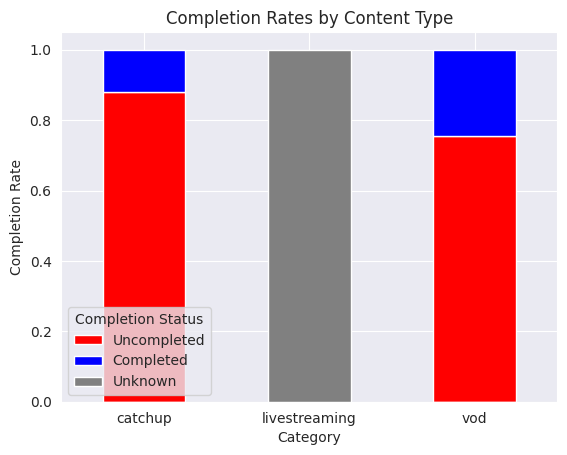

In [ ]:
colors = ['red', 'blue', 'grey']

sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
completion_rate_by_content_type.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Category')
plt.ylabel('Completion Rate')
plt.title('Completion Rates by Content Type')
plt.legend(title='Completion Status',labels=['Uncompleted', 'Completed', 'Unknown'], loc= 'lower left')
plt.xticks(rotation=0)
plt.show()

In [ ]:
completion_rate_by_content_type.mean()

completed
Uncompleted    0.816757
Completed      0.183243
unknown        1.000000
dtype: float64

Observation:
1. There is a significant gap in completion rates between catchup and VOD content. Catchup content shows a higher proportion of viewers leaving the content uncompleted compared to VOD content.
2. Further investigation or data collection  is required to determine the completion rate for livestreaming content, as it is unknown based on the available information.
3. The low completion rates across all content types suggest that viewer engagement and retention could be improved. Strategies to encourage viewers to watch content until completion may be beneficial.
4. Understanding the reasons behind low completion rates, such as content quality, duration, user experience, or viewer preferences, can help Vidio.com identify areas for improvement and optimize content offerings.
5. It may be valuable to analyze the content types with higher completion rates to identify common characteristics or factors that contribute to higher viewer engagement and completion.


Further analysis can be conducted to identify potential factors affecting completion rates, such as content duration, content quality, or viewer preferences.


##Based on category

In [ ]:
completion_rate_by_category = df_dropped.groupby('category_name')['completed'].value_counts(normalize=True)
completion_rate_by_category = completion_rate_by_category.unstack().rename({'True': 'Completed', 'False': 'Uncompleted', 'unknown': 'Unknown'}, axis=1)

<Figure size 1500x800 with 0 Axes>

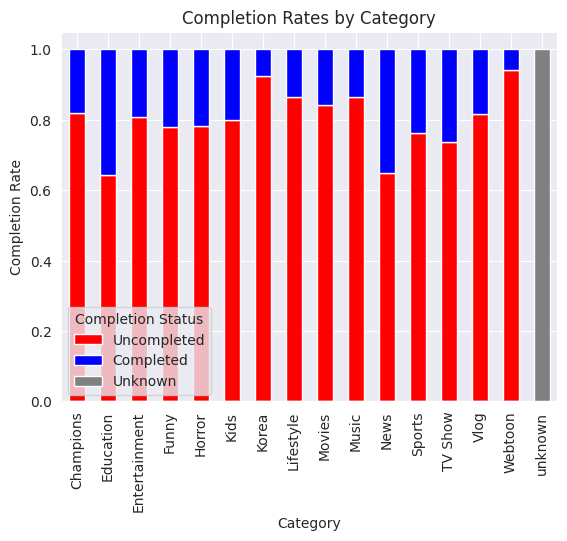

In [ ]:
colors = ['red', 'blue', 'grey']

sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
completion_rate_by_category.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Category')
plt.ylabel('Completion Rate')
plt.title('Completion Rates by Category')
plt.legend(title='Completion Status',labels=['Uncompleted', 'Completed', 'Unknown'])
plt.show()

In [ ]:
completion_rate_by_category.mean()

completed
Uncompleted    0.802309
Completed      0.197691
unknown        1.000000
dtype: float64

Observation:
1. Very Low Completed Rates: Webtoon and Korea categories have completion rates approximately less than 10%.
2. Lower Completed Rates: Champions, Entertainment, Lifestyle, Movies, Music, and Vlog have completion rates less than 20%.
3. Low Completed Rates: Categories such as Funny, Horror, Kids, Sport, and TV Shows have completion rates less than 30%.
4. These low completed rates indicates that a significant majority of viewers in these categories do not complete the content. Possible reasons could include viewers losing interest, not finding the content engaging enough, or other factors specific to these categories.
5. Moderate Completed Rates: Education and News categories have completion rates less than 40% which means there is still room for improvement in engaging viewers of educational and news content.
6. Further analysis or data collection would be required to determine the completion rates for unknown.


The high average uncompleted rate of 80% indicates that, on average, a significant majority of viewers do not finish watching the content.

##Based on ads in content

<Figure size 1500x800 with 0 Axes>

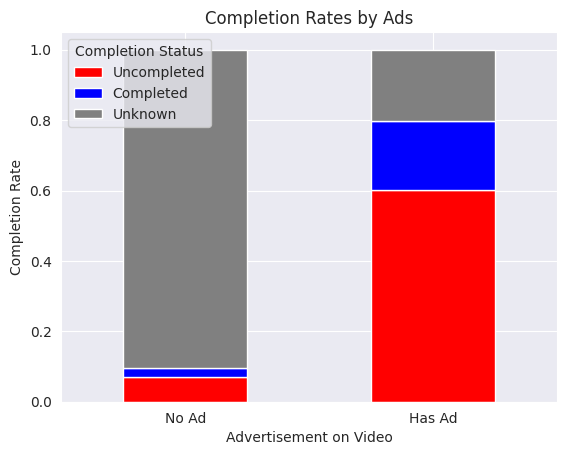

In [ ]:
completion_rate_by_ad = df_dropped.groupby('has_ad')['completed'].value_counts(normalize=True)
completion_rate_by_ad = completion_rate_by_ad.unstack().rename({'True': 'Completed', 'False': 'Uncompleted','unknown': 'Unknown'}, axis=1)

colors = ['red', 'blue', 'grey']
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
completion_rate_by_ad.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Advertisement on Video')
plt.ylabel('Completion Rate')
plt.title('Completion Rates by Ads')
plt.legend(title='Completion Status',labels=['Uncompleted', 'Completed', 'Unknown'])
plt.xticks(ticks=[0, 1], labels=['No Ad', 'Has Ad'], rotation=0)
plt.show()


In [ ]:
completion_rate_by_ad.mean()

completed
False      0.336036
True       0.110056
Unknown    0.553908
dtype: float64

Observation:
1. Content without Ads: Content without any advertisements has a completion rate of approximately less than 10%, indicating that a very small proportion of viewers complete such content. Additionally, around 80% of the completion status for this type of content is unknown, which suggests a lack of available data or tracking for these cases.
2. Content with Ads: Content that includes advertisements has a completion rate of 20%, meaning that a relatively higher proportion of viewers complete this type of content compared to ad-free content. However, 60% of viewers do not complete the content, indicating a significant portion of drop-offs. Similar to the content without ads, the completion status for a portion of this content (the rest) is unknown, potentially due to data limitations.
3. Average of Unknown completion status is around 55% across all content types, which suggests a need for better data tracking or analysis methodologies. It may be challenging to draw accurate conclusions regarding completion rates based on ads. To gain better insights, it would be necessary to obtain or collect comprehensive data on premium users' viewing patterns and completion rates for content without ads.


the high percentage of unknown completion statuses indicates a potential data tracking issue or limited information available.

#Completion Rates Analysis Summary


> Across different dimensions, such as content type, category, and the presence of ads, it is evident that completion rates are generally low on Vidio.com. Most of the users do not complete the content they watch, with completion rates varying between content types, categories, and inclusion of ads in content. These findings emphasize the need for further analysis and strategies to enhance user engagement, optimize content offerings, and improve completion rates on Vidio.com.






---



---



#Engagement and Duration Analysis

In [ ]:
df_dropped['play_duration_minutes'] = df_dropped['play_duration'] / 60
df_dropped['play_duration_minutes'].mean()

7.212171171195524

Average of Vidio users watch the contents on app is 7 minutes

##Based on content type

In [ ]:
grouped_data = df_dropped.groupby('content_type').agg({'hash_watcher_id': 'count', 'play_duration_minutes': 'mean'})
grouped_data = grouped_data.sort_values('hash_watcher_id',ascending=False)


In [ ]:
grouped_data

,hash_watcher_id,play_duration_minutes
content_type,,
vod,467975,4.071977
livestreaming,269040,12.428928
catchup,2833,30.514737


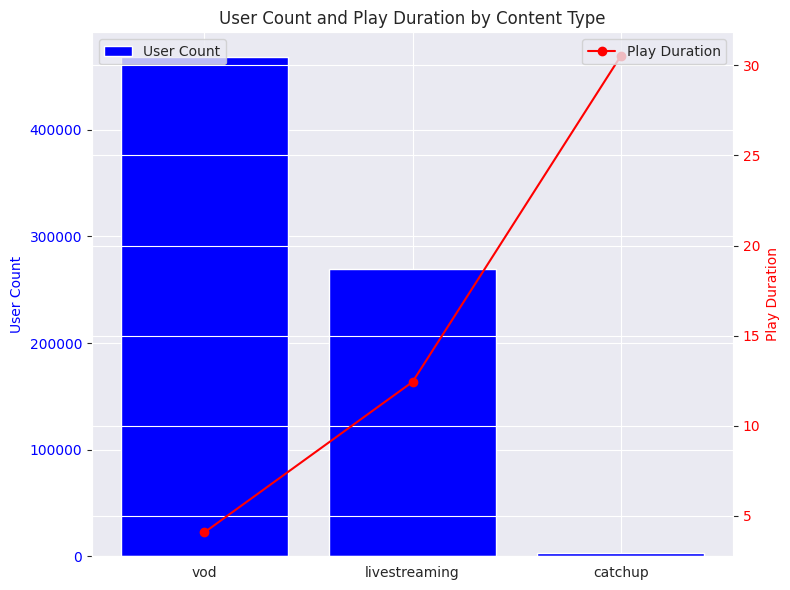

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(grouped_data.index, grouped_data['hash_watcher_id'], color='b')
ax1.set_ylabel('User Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['play_duration_minutes'], color='r', marker='o')
ax2.set_ylabel('Play Duration', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('User Count and Play Duration by Content Type')

ax1.legend(['User Count'], loc='upper left')
ax2.legend(['Play Duration'], loc='upper right')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
grouped_data.mean()

hash_watcher_id          246616.000000
play_duration_minutes        15.671881
dtype: float64

Observation:

while VOD content attracts a larger audience, it may not necessarily result in longer play durations. Catchup content, although appealing to a smaller audience, tends to have higher engagement with longer play durations. Livestreaming content falls in between, with moderate play durations and user counts.

These findings highlight the importance of considering both user count and play duration when analyzing content engagement. It implies that although VOD content may have a broader reach, efforts should be made to increase the play duration and enhance user engagement. Conversely, focusing on enhancing user count and promoting Livestreaming and Catchup content can potentially result in longer play durations and deeper engagement.



##Based on category

In [ ]:
grouped_data2 = df_dropped.groupby('category_name').agg({'hash_watcher_id': 'count', 'play_duration_minutes': 'mean'})
grouped_data2 = grouped_data2.sort_values('hash_watcher_id',ascending=False)


In [ ]:
grouped_data2

,hash_watcher_id,play_duration_minutes
category_name,,
unknown,269040,12.428928
Entertainment,152679,0.953948
News,146847,0.577793
Sports,53818,0.578894
Movies,39829,15.987644
TV Show,30155,26.759314
Music,16966,9.094888
Vlog,11935,9.065769
Lifestyle,9491,0.554636


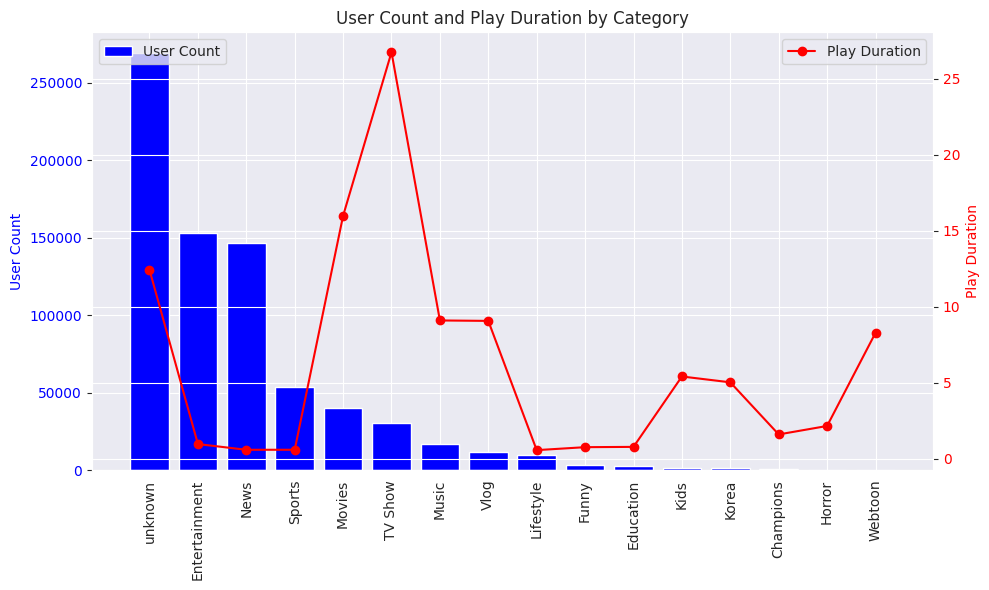

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(grouped_data2.index, grouped_data2['hash_watcher_id'], color='b')
ax1.set_ylabel('User Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(grouped_data2.index, grouped_data2['play_duration_minutes'], color='r', marker='o')
ax2.set_ylabel('Play Duration', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('User Count and Play Duration by Category')

ax1.legend(['User Count'], loc='upper left')
ax2.legend(['Play Duration'], loc='upper right')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

plt.show()


In [ ]:
grouped_data2.mean()

hash_watcher_id          46240.500000
play_duration_minutes        6.247385
dtype: float64

Observation:
1. Unknown Category: The unknown category has the highest user count, indicating a significant number of viewers. However, the average play duration for this category is relatively low at approximately 12.4 minutes. This suggests a need for further investigation to categorize the content and factors that contribute to user engagement.
2. Movies and TV Shows: Despite having lower user counts compared to the unknown category, Movies and TV Shows demonstrate higher play durations. This indicates that viewers in these categories tend to engage with the content for longer periods, with play durations averaging around 16 minutes and 27 minutes, respectively. This highlights the potential appeal and engagement of movies and TV shows among the viewers.
3. Music, Vlog, Kids, and Korea: These categories have moderate user counts, and their average play durations range from 5 to 9 minutes. While the play durations are not as high as movies or TV shows, they still demonstrate a reasonable level of engagement from viewers.
4. Entertainment, News, Sports, Lifestyle, Funny, Education, Champions, Horror, Webtoon: These categories have relatively low user counts and play durations, averaging around 1 to 6 minutes. This indicates that viewers in these categories may have shorter engagement periods or lower overall interest in the content.

categories with lower user counts generally exhibit shorter play durations, indicating a need to explore strategies to increase engagement and retention for those categories.The average play duration of 6 minutes across all categories provides a benchmark to evaluate the engagement levels




##Based on user subscription

In [ ]:
grouped_data3 = df_dropped.groupby('has_ad').agg({'hash_watcher_id': 'count', 'play_duration_minutes': 'mean'})
grouped_data3.index = ['Non-Premium User' if val == 'True' else 'Premium User' for val in grouped_data3.index]
grouped_data3 = grouped_data3.sort_values('hash_watcher_id', ascending=False)


In [ ]:
grouped_data3

,hash_watcher_id,play_duration_minutes
Non-Premium User,570173,5.294704
Premium User,169675,13.655596


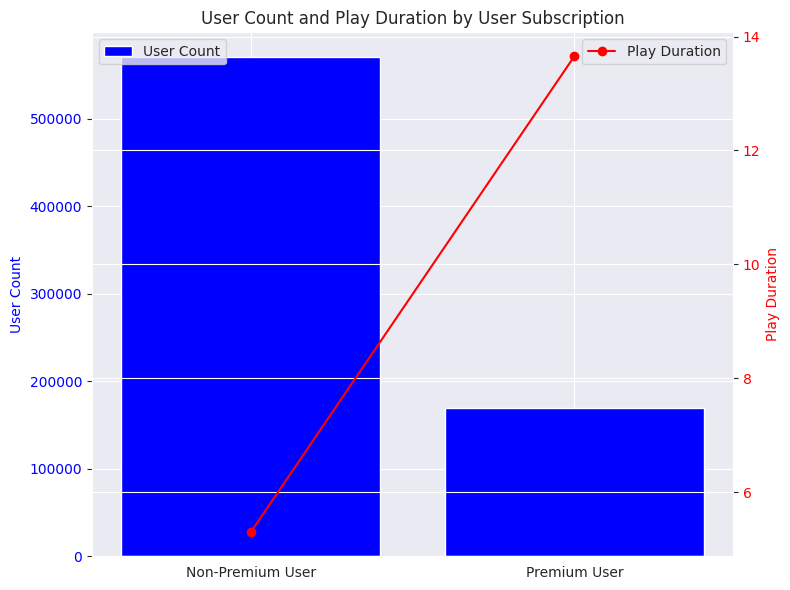

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(range(len(grouped_data3.index)), grouped_data3['hash_watcher_id'], color='b')
ax1.set_ylabel('User Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(len(grouped_data3.index)))
ax1.set_xticklabels(grouped_data3.index)

ax2 = ax1.twinx()
ax2.plot(range(len(grouped_data3.index)), grouped_data3['play_duration_minutes'], color='r', marker='o')
ax2.set_ylabel('Play Duration', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('User Count and Play Duration by User Subscription')

ax1.legend(['User Count'], loc='upper left')
ax2.legend(['Play Duration'], loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
grouped_data3.mean()

hash_watcher_id          369924.00000
play_duration_minutes         9.47515
dtype: float64

Observation:
1. Non-Premium users has a larger audience base. However, the average play duration for Non-Premium users is relatively lower. This suggests that Non-Premium users may have shorter engagement periods or may be less likely to watch content for extended durations.
2. Premium users have a lower user count compared to Non-Premium users, indicating a smaller but potentially more dedicated user base. The average play duration for Premium users is significantly higher. This indicates that Premium users tend to engage with the content for longer durations.  Premium users, who likely have access to additional features or benefits, exhibit longer play durations, indicating a higher level of engagement and potentially higher satisfaction with the content.


The average play duration of 9 minutes across all user subscriptions provides a benchmark to evaluate engagement levels.

##Based on platform

In [ ]:
grouped_data4 = df_dropped.groupby('platform').agg({'hash_watcher_id': 'count', 'play_duration_minutes': 'mean'})
grouped_data4 = grouped_data4.sort_values('hash_watcher_id',ascending=False)


In [ ]:
grouped_data4

,hash_watcher_id,play_duration_minutes
platform,,
web-mobile,428195,2.087057
app-android,180635,14.764947
web-desktop,70109,10.388549
tv-android,41379,19.622120
app-ios,12479,8.796637
tv-tizen,7046,17.756190
tv-webos,5,3.750000


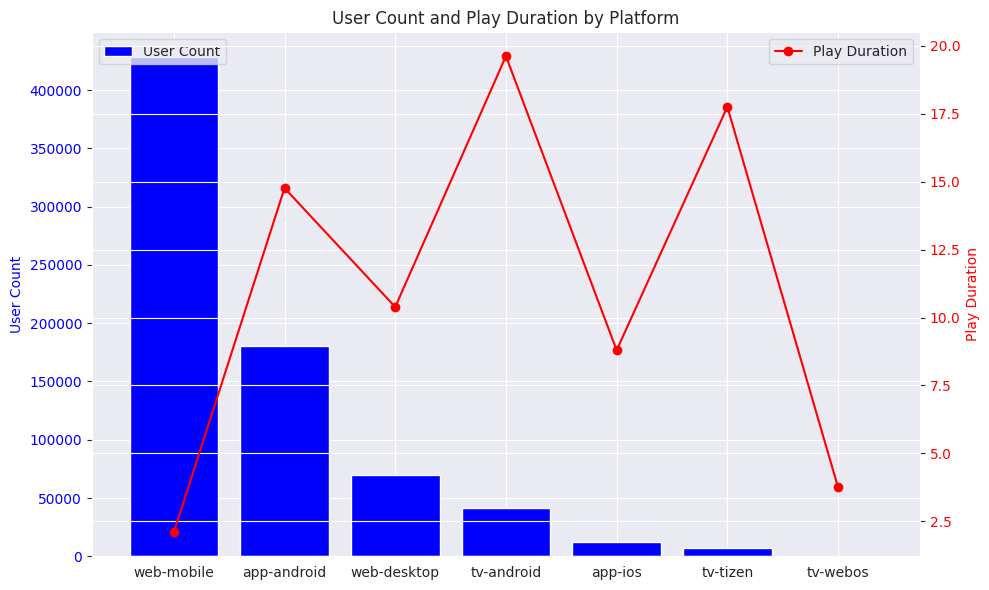

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(range(len(grouped_data4.index)), grouped_data4['hash_watcher_id'], color='b')
ax1.set_ylabel('User Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(len(grouped_data4.index)))
ax1.set_xticklabels(grouped_data4.index)

ax2 = ax1.twinx()
ax2.plot(range(len(grouped_data4.index)), grouped_data4['play_duration_minutes'], color='r', marker='o')
ax2.set_ylabel('Play Duration', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('User Count and Play Duration by Platform')

ax1.legend(['User Count'], loc='upper left')
ax2.legend(['Play Duration'], loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Observation:

Based on the graph, although web-mobile has the most users, the platform that users keenly use to watch Vidio is TV-Android, with a relatively high average play duration. Users accessing Vidio through TV-Android exhibit longer engagement periods, which suggests a higher level of interest and commitment to watching videos on this platform. It indicates that users prefer the larger screen and immersive experience offered by TV-Android for their video consumption.




---



---



#THANKS!


Hit me up on: sheilaftria@gmail.com

[See more projects here](https://sheilafitria.github.io)

